In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

In [104]:
train1 = pd.read_csv('train_for_y1.csv')
train2 = pd.read_csv('train_for_y2.csv')
train3 = pd.read_csv('train_for_y3.csv')
train4 = pd.read_csv('train_for_y4.csv')
train5 = pd.read_csv('train_for_y5.csv')
test = pd.read_csv('test_finished.csv')

In [105]:
train1_Y = train1.TargetPrice
train1_X = train1.drop(['TargetPrice'], axis = 1)
train2_Y = train2.TargetPrice
train2_X = train2.drop(['TargetPrice'], axis = 1)
train3_Y = train3.TargetPrice
train3_X = train3.drop(['TargetPrice'], axis = 1)
train4_Y = train4.TargetPrice
train4_X = train4.drop(['TargetPrice'], axis = 1)
train5_Y = train5.TargetPrice
train5_X = train5.drop(['TargetPrice'], axis = 1)

In [106]:
def linear_regression(X, Y):
    print('Start')
    X['intercept'] = 1
    X_transposed = X.T
    X_muli_Xt = X_transposed.dot(X)
    print(X_muli_Xt.shape)
    X_muli_Xt_inv = np.linalg.inv(X_muli_Xt)
    X_muli_Xt_inv_multi_Xt = np.dot(X_muli_Xt_inv, X.T)
    print(X_muli_Xt_inv_multi_Xt.shape)
    coefs = np.dot(X_muli_Xt_inv_multi_Xt, Y)
    print('End')
    return coefs

In [107]:
coefs1 = linear_regression(train1_X, train1_Y)
coefs2 = linear_regression(train2_X, train2_Y)
coefs3 = linear_regression(train3_X, train3_Y)
coefs4 = linear_regression(train4_X, train4_Y)
coefs5 = linear_regression(train5_X, train5_Y)

Start
(17, 17)
(17, 107)
End
Start
(17, 17)
(17, 107)
End
Start
(17, 17)
(17, 107)
End
Start
(17, 17)
(17, 107)
End
Start
(17, 17)
(17, 107)
End


In [108]:
def predict(train_X, coefs):
    train_Y_TEST = train_X.Bid_Price_min * coefs[0] + \
                    train_X.Bid_Shares_min * coefs[1] + \
                    train_X.Ask_Price_min * coefs[2] + \
                    train_X.Ask_Shares_min * coefs[3] + \
                    train_X.FeatureShares2_min * coefs[4] + \
                    train_X.FeatureShares2_max * coefs[5] + \
                    train_X['0'] * coefs[6] + \
                    train_X['1'] * coefs[7] + \
                    train_X['2'] * coefs[8] + \
                    train_X['3'] * coefs[9] + \
                    train_X['4'] * coefs[10] + \
                    train_X['5'] * coefs[11] + \
                    train_X['6'] * coefs[12] + \
                    train_X['7'] * coefs[13] + \
                    train_X['8'] * coefs[14] + \
                    train_X['8'] * coefs[15] + \
                    coefs[16]
    return train_Y_TEST

In [109]:
preds1 = predict(train1_X, coefs1)
preds2 = predict(train2_X, coefs2)
preds3 = predict(train3_X, coefs3)
preds4 = predict(train4_X, coefs4)
preds5 = predict(train5_X, coefs5)

In [121]:
def error(train_Y, preds):
    return sum(abs((train_Y - preds))) / train_Y.shape[0]

In [122]:
print('Min pred train error:', error(train1_Y, preds1))
print('Max pred train error:', error(train2_Y, preds2))
print('Sum pred train error:', error(train3_Y, preds3))
print('STD pred train error:', error(train4_Y, preds4))
print('Mean pred train error:', error(train5_Y, preds5))

Min pred train error: 0.0098376490030546
Max pred train error: 34.776421703537224
Sum pred train error: 75.93865165631111
STD pred train error: 3.5746422576452925
Mean pred train error: 0.6056195060220078


In [112]:
for_testing = pd.DataFrame({'real1': train1_Y, 'preds1': preds1,
                            'real2': train2_Y, 'preds2': preds2,
                            'real3': train3_Y, 'preds3': preds3,
                            'real4': train4_Y, 'preds4': preds4,
                            'real5': train5_Y, 'preds5': preds5})
for_testing

,real1,preds1,real2,preds2,real3,preds3,real4,preds4,real5,preds5
0,0.1200,0.108907,1323.00,1391.722654,8092.3761,7955.944033,154.489774,147.828048,59.068439,59.944215
1,0.0700,0.091324,1333.67,1274.206117,9416.3020,9475.393972,146.364221,151.016809,59.596848,58.611162
2,0.0700,0.068655,1328.89,1382.772625,9729.2624,9886.017586,129.628372,133.723919,48.646312,49.686704
3,0.0800,0.092456,1359.88,1301.109416,8411.0966,8490.045919,139.521750,144.935145,54.974488,53.786511
4,0.1050,0.108044,757.91,753.230784,6649.1582,6614.015653,100.012764,100.298064,45.232369,44.723459
...,...,...,...,...,...,...,...,...,...,...
102,0.0800,0.088839,805.22,770.301990,7636.3522,7731.462679,95.929423,98.783670,45.185516,44.990704
103,0.1900,0.180553,783.89,776.185994,9525.2983,9494.139182,105.673400,105.540369,52.918324,52.742694
104,0.1200,0.120457,784.52,775.712396,8886.7205,8859.139156,85.244404,84.107395,42.317717,42.316524
105,0.1500,0.071277,768.77,882.760343,7324.1049,7585.104051,85.297784,95.706286,39.166336,39.504541


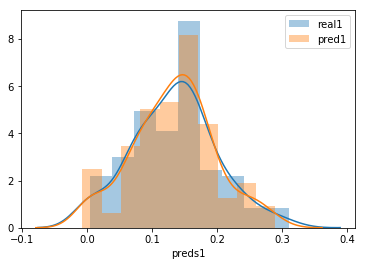

In [113]:
sns.distplot(for_testing.real1)
sns.distplot(for_testing.preds1)
plt.legend(['real1', 'pred1'])

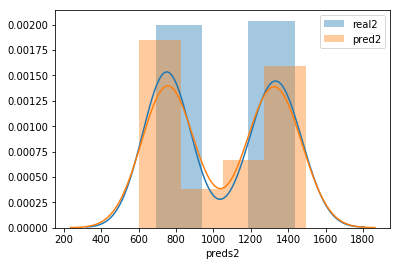

In [114]:
sns.distplot(for_testing.real2)
sns.distplot(for_testing.preds2)
plt.legend(['real2', 'pred2'])

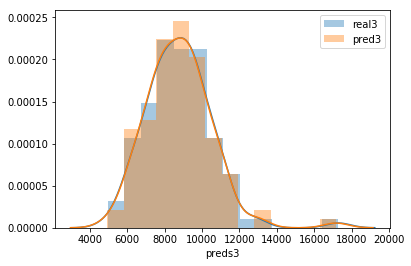

In [115]:
sns.distplot(for_testing.real3)
sns.distplot(for_testing.preds3)
plt.legend(['real3', 'pred3'])

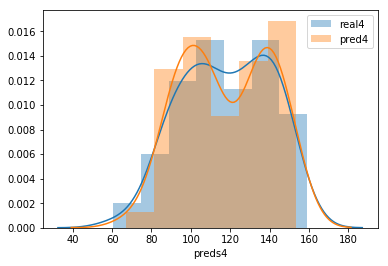

In [116]:
sns.distplot(for_testing.real4)
sns.distplot(for_testing.preds4)
plt.legend(['real4', 'pred4'])

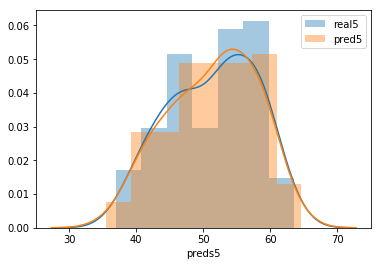

In [117]:
sns.distplot(for_testing.real5)
sns.distplot(for_testing.preds5)
plt.legend(['real5', 'pred5'])

In [118]:
test_y1 = predict(test, coefs1)
test_y2 = predict(test, coefs2)
test_y3 = predict(test, coefs3)
test_y4 = predict(test, coefs4)
test_y5 = predict(test, coefs5)

In [119]:
test_y_df = pd.DataFrame({'y1_min': test_y1,
                          'y2_max': test_y2,
                          'y3_sum': test_y3,
                          'y4_std': test_y4,
                          'y5_mean': test_y5})
test_y_df

,y1_min,y2_max,y3_sum,y4_std,y5_mean
0,0.104662,1329.366949,6671.344415,122.076903,50.929525
1,0.241485,1455.041240,11705.357038,144.677902,59.212687
2,0.072305,768.045082,12330.215274,113.231855,60.982792
3,0.088867,1080.417097,11949.220585,90.892652,47.158235
4,0.192710,790.719459,7845.486521,112.499159,57.394334
5,0.060406,632.461845,10580.734102,50.812443,30.476008
6,0.276441,1149.389910,9834.296189,117.285986,49.049673
7,-0.004171,1389.637180,8060.422390,127.458017,53.345909
8,0.201588,948.948465,11554.511950,112.319197,55.838253
9,0.219670,821.583103,9490.111637,109.190324,56.141732


In [120]:
test_y_df.describe()

,y1_min,y2_max,y3_sum,y4_std,y5_mean
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,0.143667,1081.164980,9023.488100,117.378715,50.061207
std,0.107250,315.531619,2114.290426,22.365686,7.349439
min,-0.057737,259.679666,4908.762800,50.812443,30.476008
25%,0.074705,849.479152,7650.217120,109.948441,47.631095
50%,0.114408,1103.195335,9073.855389,117.617428,50.556898
75%,0.225531,1357.222216,10394.124624,129.382412,55.417239
max,0.342394,1484.196236,12330.215274,146.675150,60.982792


In [101]:
test_y_df.to_csv('test_y_df.csv', index = False)